<a href="https://colab.research.google.com/github/sarikasea/Machine-Learning/blob/main/Machine_Learning_Pipelines_and_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Train a model using a pipeline
We'll start with an example of building a pipeline, fitting it to the Iris data, and evaluating its accuracy.

### Load the Iris data set


In [3]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

### Instantiate a pipeline consisting of StandardScaler, PCA, and KNeighborsClassifier


In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Standardize features
    ('pca', PCA(n_components=2),),       # Step 2: Reduce dimensions to 2 using PCA
    ('knn', KNeighborsClassifier(n_neighbors=5,))  # Step 3: K-Nearest Neighbors classifier
])

### Exercise 1. Split the data into training and test sets
Be sure to stratify the target.


In [6]:
# Enter your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Fit the pipeline on the training set
The pipeline consists of a sequence of three estimators, and should be viewed as the machine learning model we are training and testing.
Let's go ahead and fit the model to the training data and evaluate its accuracy.

In [7]:
pipeline.fit(X_train, y_train)

# Measure the pipeline accuracy on the test data
test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")

0.900


### Get the model predictions


In [8]:
y_pred = pipeline.predict(X_test)

### Exercise 2. Generate the confusion matrix for the KNN model and plot it


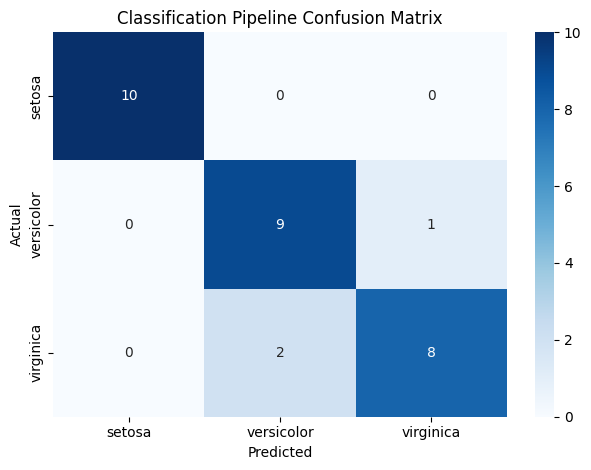

In [9]:
# generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

The model incorectly classified two viginica irises as versicolor, and one versicolor as virginica. Not bad, only three classification errors out of 30 irises on our first attempt!

### Exercise 3. Describe the errors made by the model.


Tune hyperparameters using a pipeline within cross-validation grid search
We created a model but haven't yet attempted to optimize its performance. Let's see if we can do better. Recall that it would be a mistake to keep running the model over and over again with different hyperparamters to find the best one.
You would effectively be overfiiting the model to your test data set.
The correct way to handle this tuning is to use cross validation.

Let's see how it works, using the same data set.

Instantiate the pipeline
We'll preprocess the data by scaling it and transforming it onto a to-be-determined number of principle components, follow that up with a KNN model classifier, and combine these estimators into a pipeline. We'll then optimize the pipeline using crossvalidation over a hyperparameter grid search. This will allow us find the best model for the set of trial hyperparamters.

In [10]:
# make a pipeline without specifying any parameters yet
pipeline = Pipeline(
                    [('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('knn', KNeighborsClassifier())
                    ]
                   )

### Define a model parameter grid to search over


In [11]:
# Hyperparameter search grid for numbers of PCA components and KNN neighbors
param_grid = {'pca__n_components': [2, 3],
              'knn__n_neighbors': [3, 5, 7]
             }

### Choose a cross validation method
To ensure the target is stratified, we can use scikit-learn's `StratifiedKFold` cross-validation class.


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Exercise 4. Determine the best parameters
Pass your `pipeline`, `param_grid`, and the `StratifiedKFold` cross validation method to `GridSearchCV`


In [13]:
best_model = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=2
                         )

### Fit the best `GridSearchCV` model to the training data


In [14]:
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

### Exercise 5. Evaluate the accuracy of the best model on the test set


In [15]:
test_score = best_model.score(X_test, y_test)
print(f"{test_score:.3f}")

0.933


We've made a great accuracy improvement from 90% to 93%.


### Display the best parameters


In [16]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

### Plot the confusion matrix for the predictions on the test set


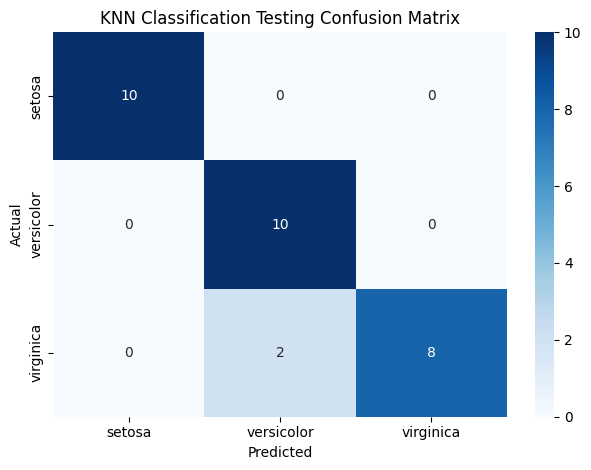

In [17]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

To read the confusion matrix:

- The rows represent the actual classes of the data points.
- The columns represent the classes predicted by the model.
- The numbers in each cell indicate the count of data points that belong to the actual class (row) and were predicted as the predicted class (column).

For example, in the confusion matrix above:
- The top-left cell shows the number of data points that were actually 'setosa' and were predicted as 'setosa' (true positives).
- The cell in the first row and second column shows the number of data points that were actually 'setosa' but were predicted as 'versicolor' (false positives).
- The cell in the second row and first column shows the number of data points that were actually 'versicolor' but were predicted as 'setosa' (false negatives).

Ideally, you want high numbers along the diagonal (true positives) and low numbers off the diagonal (false positives and false negatives).

That's impressive, only two errors where the predictions were Versicolor but the iris was actually a Virginica.

That conludes the lab. You are now equipped with an advanced methodolgy for building sophisticated machine learning models from the ground up. Still, there is much to learn of course. Digging into the rich set of examples from scikit-learn's website is a must. The help documentation is also fantastic. You'll learn something every time you look for certain. Of course, there is no substitude for gaining experience through practice.

Now it's time to roll up your sleeves and dive into a hands-on Practice Project.
